**Author:** Kaetlyn Gibson

**Bio 399**
    
**Homework 4**

# Question 1

In class we worked with a whole number of different tree buildingapproaches.  For this week’s homework I’d like you to explore their difference on our geographically diverse set of SARS-CoV-2 genomes that I have aligned for you in data/sc2_subset.align.fasta. In particular I’d like you to do the following:

1) Create a UPGMA tree from that data using biopython

2) Create a likelihood tree from that data using RAxML under the JC69 and HKY85 mutational models.

3) Compare and contrast results between these trees.  Do you notice any systematic differences?  Please write a few sentence on what differences you do or do not see.

In [1]:
# import statements needed
import os
from Bio import AlignIO
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Align import MultipleSeqAlignment
from matplotlib import pyplot as plt

## Part 1: UPGMA Tree

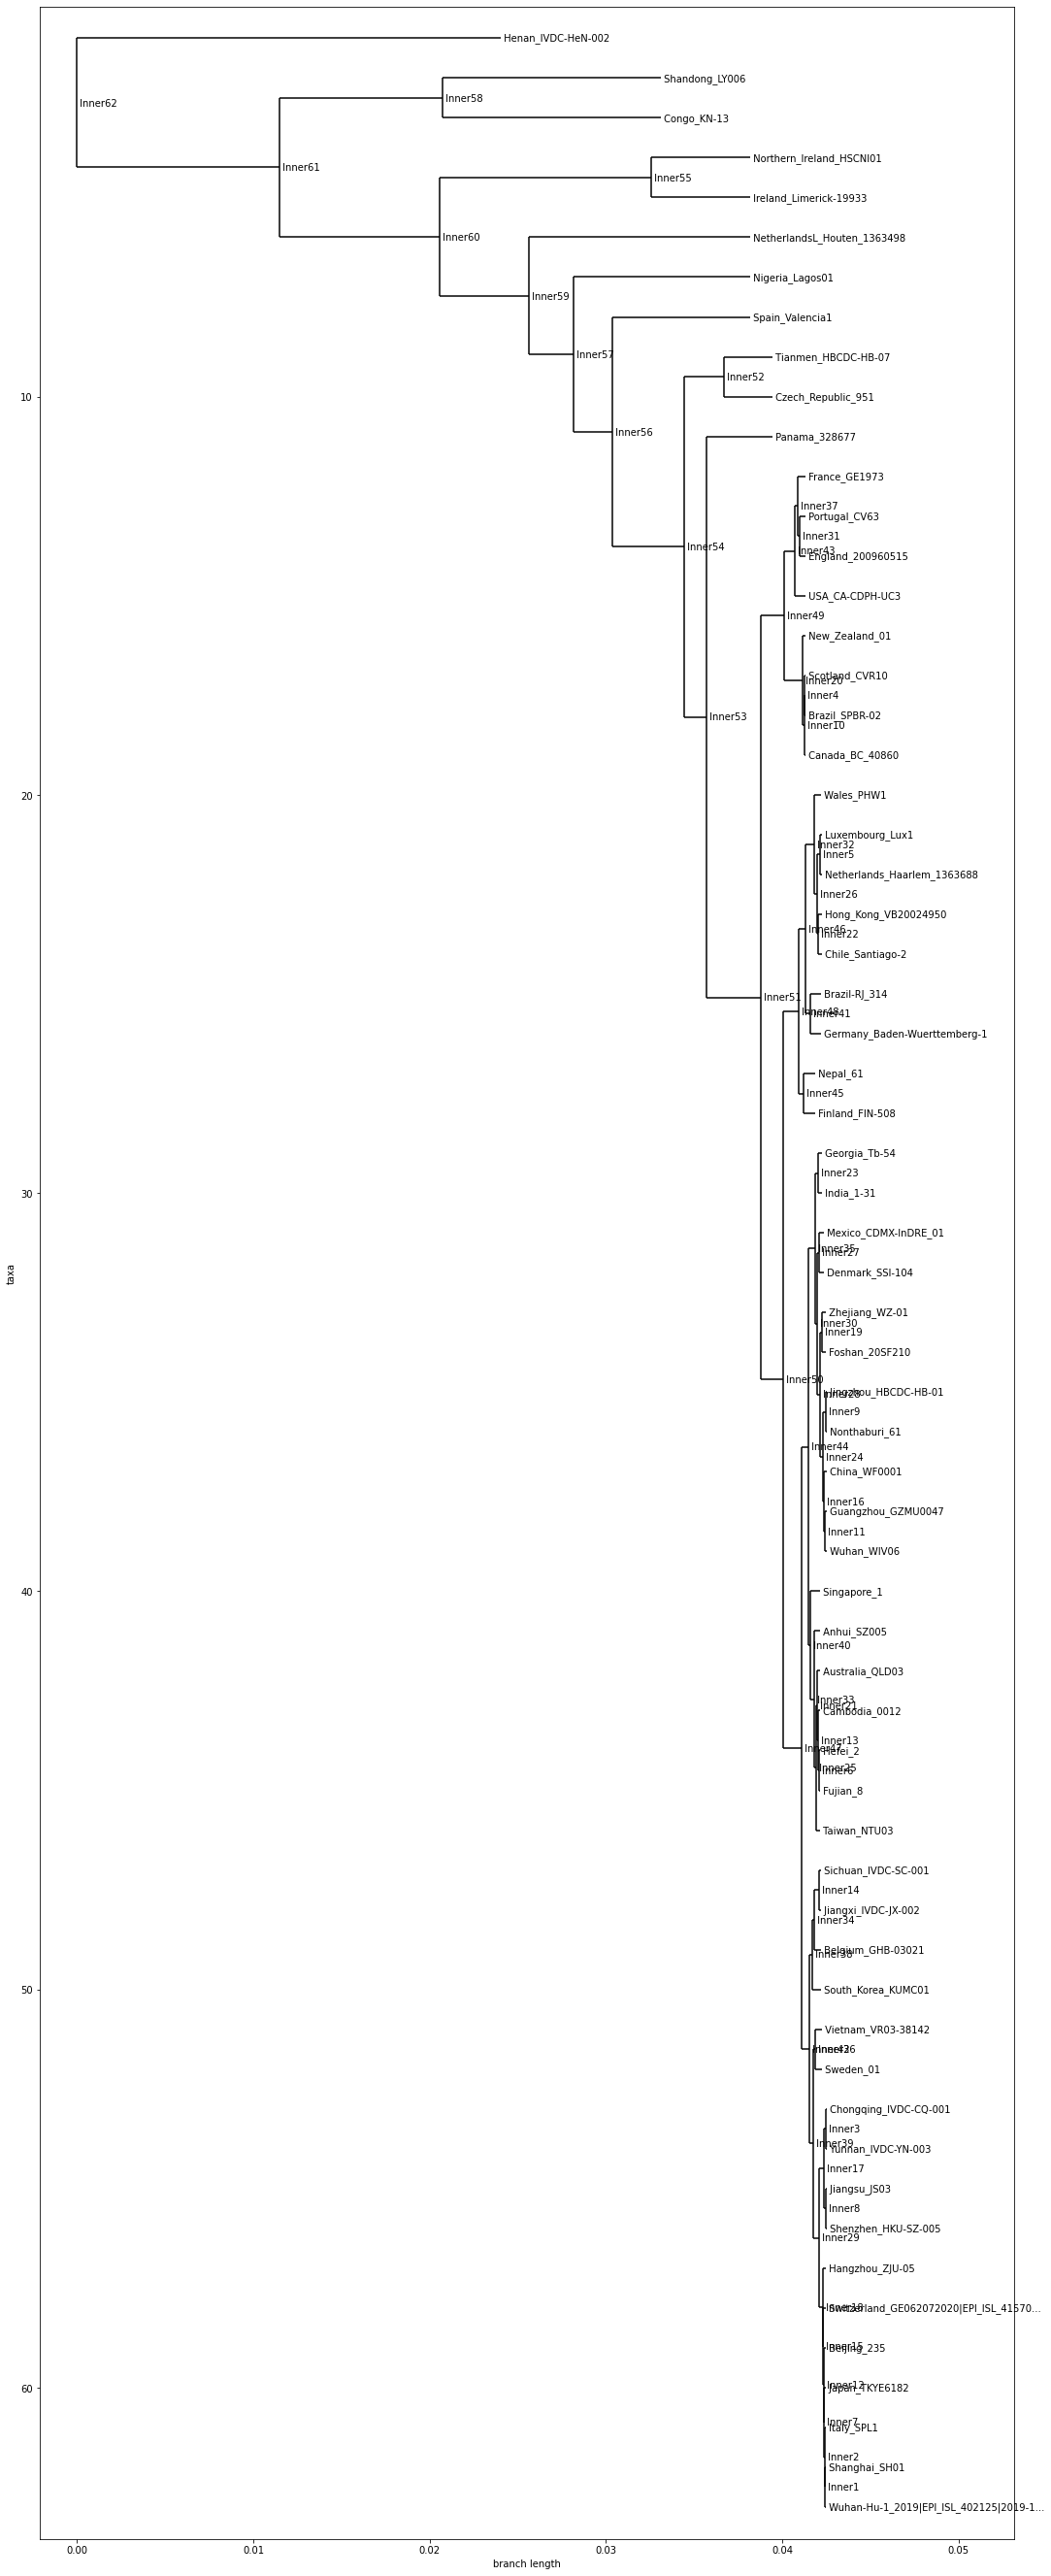

In [7]:
# UPGMA Tree
sarscov2_genome_align = AlignIO.read("data/sc2_subset.align.fasta","fasta")
fig,ax = plt.subplots(figsize=[18, 48]) # wow, this is hard to get things not to overlap

calculator = DistanceCalculator('identity')
constructor = DistanceTreeConstructor(calculator, 'upgma')
tree = constructor.build_tree(sarscov2_genome_align)

# draw tree
Phylo.draw(tree,axes=ax)
fig.axes

## Part 2: Likelihood Tree

**JC69 Mutational Model**

In [3]:
# taken from week4 notebook
#define the command line to run
raxml_cline = "raxmlHPC -m GTRCAT -n out -p 10000 --JC69 -s data/sc2_subset.align.fasta"
print("command line: "+raxml_cline)

#a function to get likelihood results
def get_lik(file):
    # get likelihood
    with open(file, "r") as f:
        for line in f:
            tok = line.split()
            if len(tok) > 0 and tok[0] == 'Final':
                lik = float(tok[-1])
    return(lik)

# clean out previous results
if os.path.exists("RAxML_info.out"):
    [os.remove(x) for x in os.listdir(".") if 'RAxML' in x]    

# now run raxml using os.system
os.system(raxml_cline)
best_tree = Phylo.read("RAxML_bestTree.out", "newick")
lik = get_lik("RAxML_info.out")
print(lik)

command line: raxmlHPC -m GTRCAT -n out -p 10000 --JC69 -s data/sc2_subset.align.fasta
-43057.731803


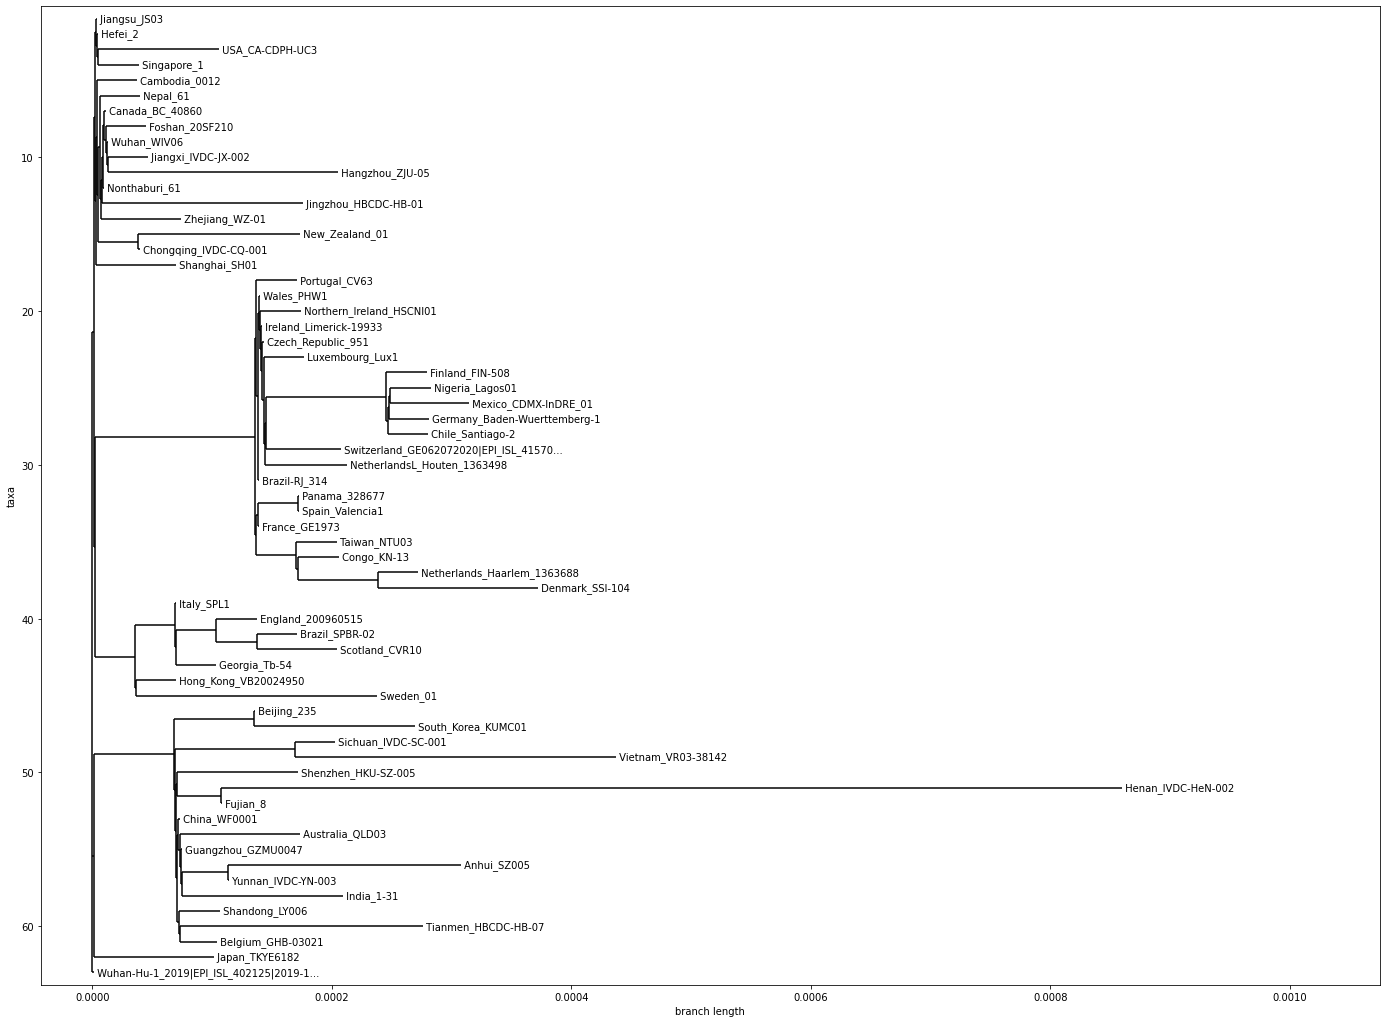

In [4]:
# draw tree
fig,ax = plt.subplots(figsize=[24, 24])
Phylo.draw(best_tree,axes=ax)

**HKY85 Mutational Model**

In [5]:
# slight edit to the one above
#define the command line to run
raxml_cline = "raxmlHPC -m GTRCAT -n out -p 10000 --HKY85 -s data/sc2_subset.align.fasta" # edit for HKY85
print("command line: "+raxml_cline)

#a function to get likelihood results
def get_lik(file):
    # get likelihood
    with open(file, "r") as f:
        for line in f:
            tok = line.split()
            if len(tok) > 0 and tok[0] == 'Final':
                lik = float(tok[-1])
    return(lik)

# clean out previous results
if os.path.exists("RAxML_info.out"):
    [os.remove(x) for x in os.listdir(".") if 'RAxML' in x]    

# now run raxml using os.system
os.system(raxml_cline)
best_tree = Phylo.read("RAxML_bestTree.out", "newick")
lik = get_lik("RAxML_info.out")
print(lik)

command line: raxmlHPC -m GTRCAT -n out -p 10000 --HKY85 -s data/sc2_subset.align.fasta
-42112.246428


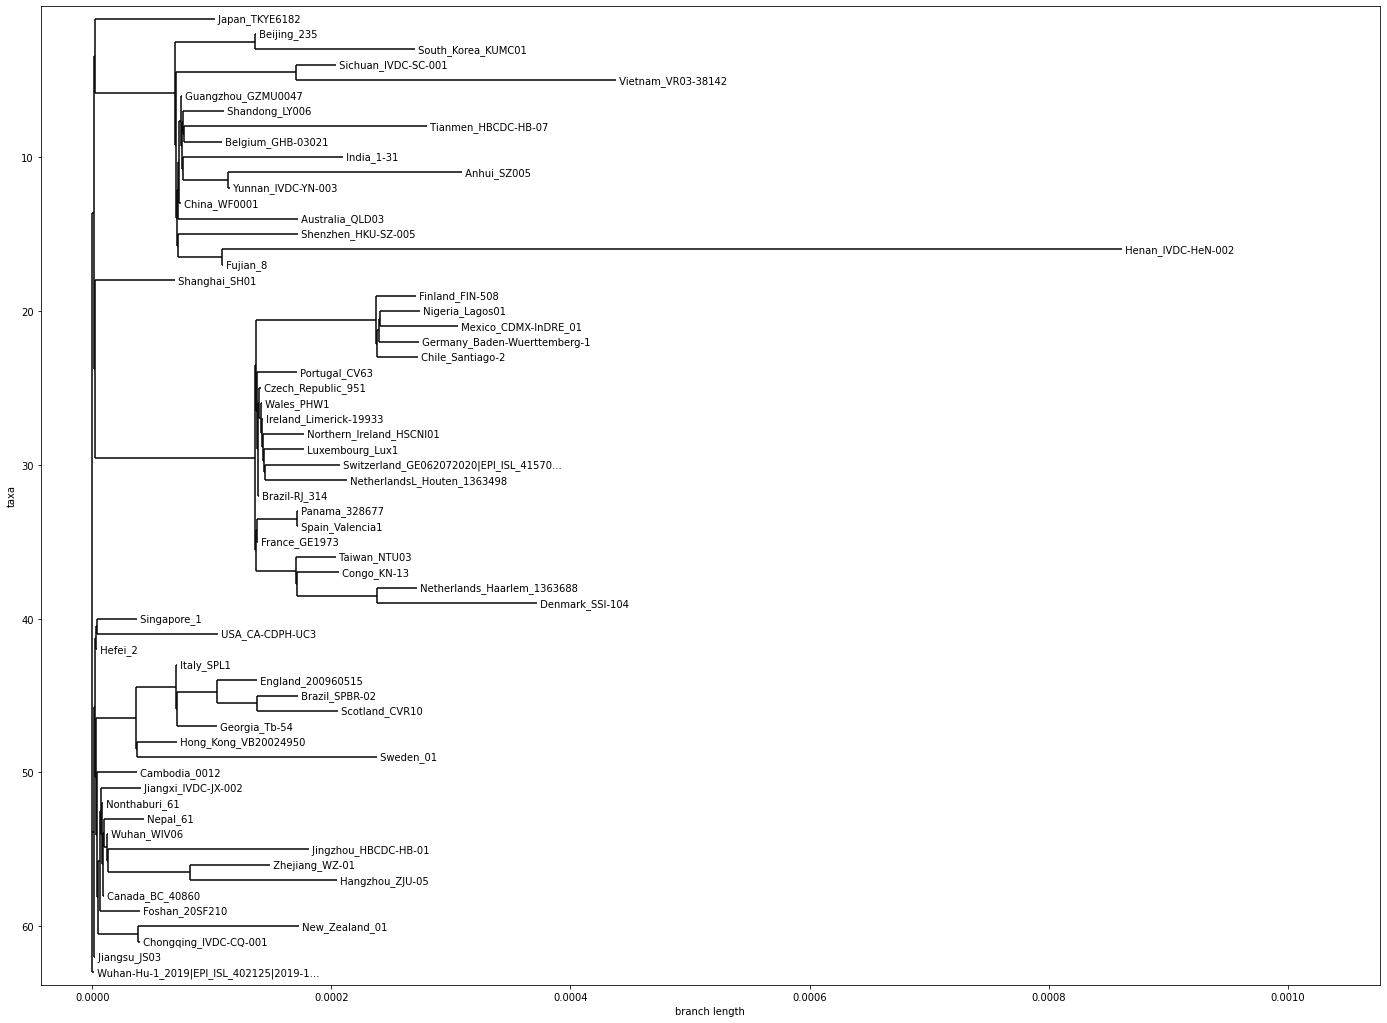

In [6]:
# draw tree
fig,ax = plt.subplots(figsize=[24,24])
Phylo.draw(best_tree,axes=ax)

## Part 3

Wow, the UPGMA tree is very hard to read compared to the JC69 and HKY85 mutational models! It also takes considerably longer to run than the other two models.

I noticed that Henan_IVDC-HeN-002 is one of the genomes that is quite highlighted by all of the models. In the UPGMA model, it has the shorted branch length. In the other two models, the branch length is by far the longest!

In the JC69 and HKY85 mutational models, there are more large clusters of taxa whereas the UPGMA tree seems to split off into smaller groups sooner. In the UPGMA tree, the first few taxa are clearly defined and spread apart, and then it gets super condensed at the longer branch lengths where the distance between taxa gets smaller.

The UPGMA also has these "Inner#" labels at each of the nodes whereas the other models don't.